In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [ ]:
housing_dataset = pd.read_csv('housing.csv')
housing_dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [29]:
housing_dataset['Area'].unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [9]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [15]:
housing_dataset['Address'].value_counts(normalize= True) * 100

Address
Punak                     4.658565
Pardis                    4.224537
West Ferdows Boulevard    4.195602
Gheitarieh                4.079861
Shahran                   3.761574
                            ...   
Chardangeh                0.028935
Mehrabad                  0.028935
Pakdasht KhatunAbad       0.028935
Kazemabad                 0.028935
Yakhchiabad               0.028935
Name: proportion, Length: 192, dtype: float64

In [35]:
housing_dataset.replace({'Area': r'\s\d+,.*'}, {'Area': np.nan}, regex= True, inplace= True)

In [37]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [48]:
housing_dataset.dropna(subset= ['Area'], inplace= True, ignore_index= True)

In [50]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   object 
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   bool   
 3   Warehouse   3473 non-null   bool   
 4   Elevator    3473 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3473 non-null   float64
 7   Price(USD)  3473 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.0+ KB


In [56]:
housing_dataset['Area'] = housing_dataset['Area'].astype('int16')

In [58]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   int16  
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   bool   
 3   Warehouse   3473 non-null   bool   
 4   Elevator    3473 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3473 non-null   float64
 7   Price(USD)  3473 non-null   float64
dtypes: bool(3), float64(2), int16(1), int64(1), object(1)
memory usage: 125.6+ KB


In [62]:
housing_dataset.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [66]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output= False)
parking_df = pd.DataFrame(one_hot.fit_transform(housing_dataset[['Parking']]), columns= one_hot.get_feature_names_out())
parking_df.head()

,Parking_False,Parking_True
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [70]:
warehouse_df = pd.DataFrame(one_hot.fit_transform(housing_dataset[['Warehouse']]), columns= one_hot.get_feature_names_out())
warehouse_df.head()

,Warehouse_False,Warehouse_True
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [74]:
elevator_df = pd.DataFrame(one_hot.fit_transform(housing_dataset[['Elevator']]), columns= one_hot.get_feature_names_out())
elevator_df.head()

,Elevator_False,Elevator_True
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [76]:
new_housing_ds = pd.concat((housing_dataset.iloc[:,0:2], housing_dataset.iloc[:,5:8], parking_df, warehouse_df, elevator_df), axis= 1)
new_housing_ds.head()

,Area,Room,Address,Price,Price(USD),Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63,1,Shahran,1.850000e+09,61666.67,0.0,1.0,0.0,1.0,0.0,1.0
1,60,1,Shahran,1.850000e+09,61666.67,0.0,1.0,0.0,1.0,0.0,1.0
2,79,2,Pardis,5.500000e+08,18333.33,0.0,1.0,0.0,1.0,0.0,1.0
3,95,2,Shahrake Qods,9.025000e+08,30083.33,0.0,1.0,0.0,1.0,0.0,1.0
4,123,2,Shahrake Gharb,7.000000e+09,233333.33,0.0,1.0,0.0,1.0,0.0,1.0


In [78]:
new_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3473 non-null   int16  
 1   Room             3473 non-null   int64  
 2   Address          3450 non-null   object 
 3   Price            3473 non-null   float64
 4   Price(USD)       3473 non-null   float64
 5   Parking_False    3473 non-null   float64
 6   Parking_True     3473 non-null   float64
 7   Warehouse_False  3473 non-null   float64
 8   Warehouse_True   3473 non-null   float64
 9   Elevator_False   3473 non-null   float64
 10  Elevator_True    3473 non-null   float64
dtypes: float64(8), int16(1), int64(1), object(1)
memory usage: 278.2+ KB


In [82]:
new_housing_ds.fillna({'Address': new_housing_ds['Address'].mode()[0]}, inplace= True)

In [84]:
new_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3473 non-null   int16  
 1   Room             3473 non-null   int64  
 2   Address          3473 non-null   object 
 3   Price            3473 non-null   float64
 4   Price(USD)       3473 non-null   float64
 5   Parking_False    3473 non-null   float64
 6   Parking_True     3473 non-null   float64
 7   Warehouse_False  3473 non-null   float64
 8   Warehouse_True   3473 non-null   float64
 9   Elevator_False   3473 non-null   float64
 10  Elevator_True    3473 non-null   float64
dtypes: float64(8), int16(1), int64(1), object(1)
memory usage: 278.2+ KB


In [86]:
new_housing_ds_copy= new_housing_ds.copy()

In [98]:
new_housing_ds_copy.drop(['Address'], axis= 1, inplace= True)
new_housing_ds_copy.head()

,Area,Room,Price,Price(USD),Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63,1,1.850000e+09,61666.67,0.0,1.0,0.0,1.0,0.0,1.0
1,60,1,1.850000e+09,61666.67,0.0,1.0,0.0,1.0,0.0,1.0
2,79,2,5.500000e+08,18333.33,0.0,1.0,0.0,1.0,0.0,1.0
3,95,2,9.025000e+08,30083.33,0.0,1.0,0.0,1.0,0.0,1.0
4,123,2,7.000000e+09,233333.33,0.0,1.0,0.0,1.0,0.0,1.0


C:\Users\ExoGame\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:121: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


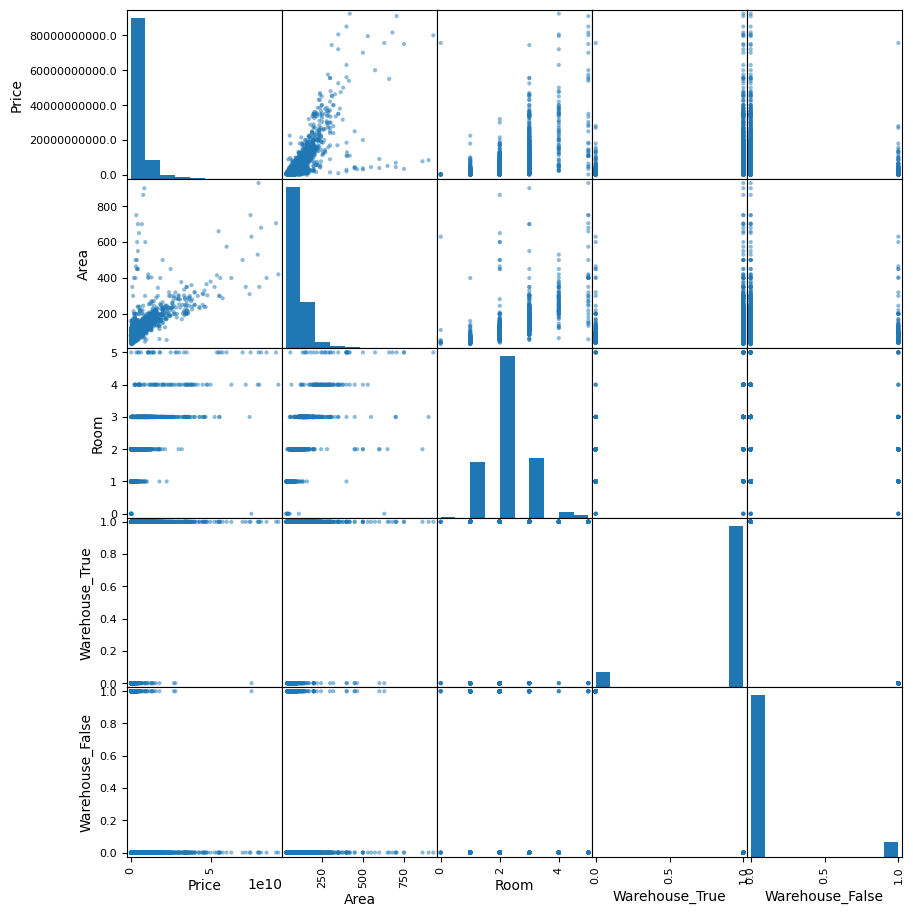

In [116]:
features= ['Price', 'Area', 'Room', 'Warehouse_True', 'Warehouse_False']
scatter_matrix(new_housing_ds_copy[features], figsize= (10, 11))
plt.show()

In [124]:
corr_matrix= new_housing_ds_copy.corr()
corr_matrix['Price'].sort_values(ascending= False)

Price              1.000000
Price(USD)         1.000000
Area               0.722647
Room               0.567610
Parking_True       0.190532
Elevator_True      0.111861
Warehouse_True     0.109971
Warehouse_False   -0.109971
Elevator_False    -0.111861
Parking_False     -0.190532
Name: Price, dtype: float64

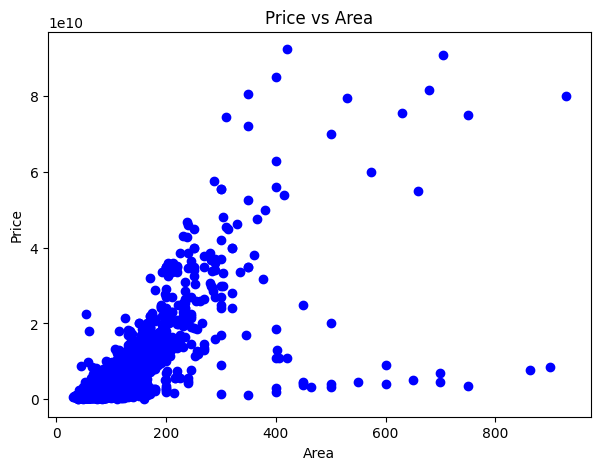

In [128]:
plt.figure(figsize= (7, 5))
plt.scatter(x= new_housing_ds.Area, y= new_housing_ds.Price, color= 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [134]:
len(new_housing_ds['Address'].unique())

192

In [140]:
address = np.random.randint(0, 192, 3473)
address

array([  3,   4,  49, ..., 101,  13,  72])

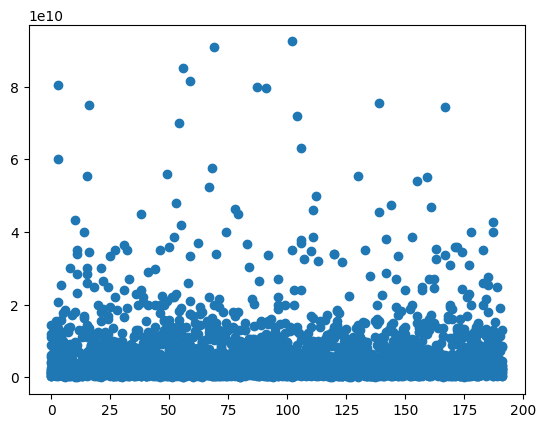

In [142]:
plt.scatter(x= address, y= new_housing_ds.Price)
plt.show()

In [144]:
new_housing_ds['Room'].value_counts()

Room
2    1956
3     731
1     673
4      70
5      33
0      10
Name: count, dtype: int64

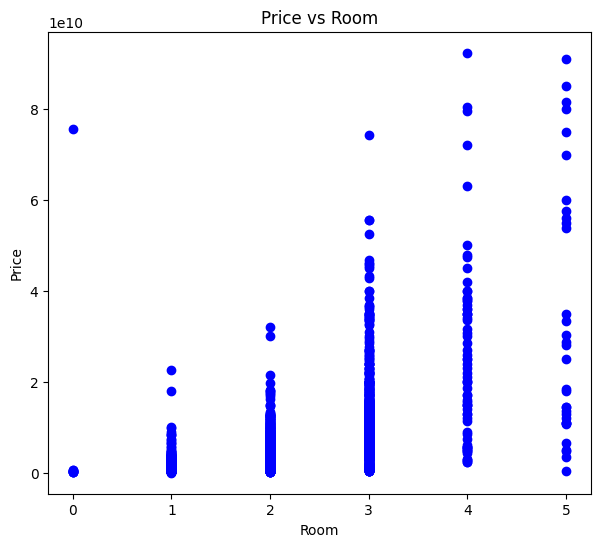

In [154]:
plt.figure(figsize= (7, 6))
plt.scatter(x= new_housing_ds.Room, y= new_housing_ds.Price, color= 'blue')
plt.xlabel('Room')
plt.ylabel('Price')
plt.title('Price vs Room')
plt.show()

In [158]:
train_set, test_set = train_test_split(new_housing_ds, test_size= 0.2, random_state= 42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2778 entries, 1822 to 3174
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2778 non-null   int16  
 1   Room             2778 non-null   int64  
 2   Address          2778 non-null   object 
 3   Price            2778 non-null   float64
 4   Price(USD)       2778 non-null   float64
 5   Parking_False    2778 non-null   float64
 6   Parking_True     2778 non-null   float64
 7   Warehouse_False  2778 non-null   float64
 8   Warehouse_True   2778 non-null   float64
 9   Elevator_False   2778 non-null   float64
 10  Elevator_True    2778 non-null   float64
dtypes: float64(8), int16(1), int64(1), object(1)
memory usage: 244.2+ KB


In [160]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 3000 to 568
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             695 non-null    int16  
 1   Room             695 non-null    int64  
 2   Address          695 non-null    object 
 3   Price            695 non-null    float64
 4   Price(USD)       695 non-null    float64
 5   Parking_False    695 non-null    float64
 6   Parking_True     695 non-null    float64
 7   Warehouse_False  695 non-null    float64
 8   Warehouse_True   695 non-null    float64
 9   Elevator_False   695 non-null    float64
 10  Elevator_True    695 non-null    float64
dtypes: float64(8), int16(1), int64(1), object(1)
memory usage: 61.1+ KB


In [300]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2, include_bias= False)
train_x = np.asanyarray(train_set[['Room']])
train_y = np.asanyarray(train_set[['Price']])
print(train_x[:4])

[[3]
 [1]
 [2]
 [3]]


In [302]:
train_poly_x = poly.fit_transform(train_x)
print(train_poly_x)
print(poly.get_feature_names_out())

[[3. 9.]
 [1. 1.]
 [2. 4.]
 ...
 [2. 4.]
 [3. 9.]
 [2. 4.]]
['x0' 'x0^2']


In [304]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(train_poly_x, train_y)
print(regr.coef_)
print(regr.intercept_)

[[-4.46792300e+09  2.24941323e+09]]
[3.6572607e+09]


In [308]:
x = np.arange(0, 6)
print(x)
yy = regr.intercept_[0] + regr.coef_[0][0] * x + regr.coef_[0][1] * np.power(x, 2)

[0 1 2 3 4 5]


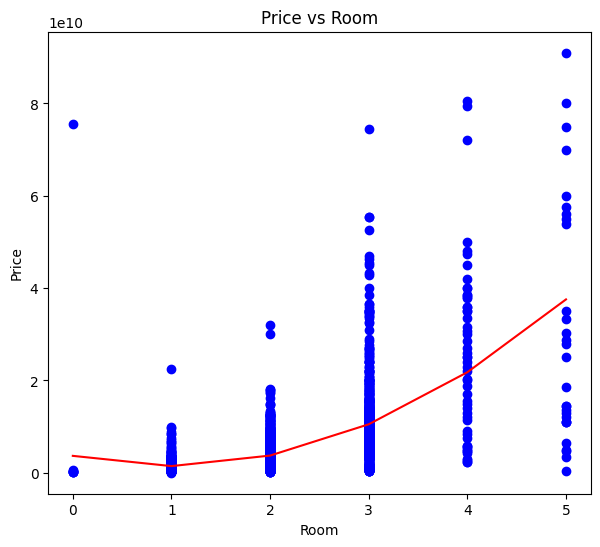

In [310]:
plt.figure(figsize= (7, 6))
plt.scatter(x= train_set.Room, y= train_set.Price, color= 'blue')
plt.plot(x, yy, color= 'red')
plt.xlabel('Room')
plt.ylabel('Price')
plt.title('Price vs Room')
plt.show()

In [314]:
test_room = np.asanyarray(test_set[['Room']])
test_price = np.asanyarray(test_set[['Price']])
test_poly_room = poly.fit_transform(test_room)
test_poly_room

array([[3., 9.],
       [2., 4.],
       [3., 9.],
       ...,
       [2., 4.],
       [2., 4.],
       [3., 9.]])

In [316]:
y_hat = regr.predict(test_poly_room)
print(r2_score(test_price, y_hat))

0.42485748226374187


In [318]:
train_area = np.asanyarray(train_set[['Area']])
train_price = np.asanyarray(train_set[['Price']])

In [320]:
regr.fit(train_area, train_price)
print(regr.coef_)
print(regr.intercept_)

[[79025528.20315935]]
[-3.09953905e+09]


In [324]:
test_area = np.asanyarray(test_set[['Area']])
test_price = np.asanyarray(test_set[['Price']])
y_hat = regr.predict(test_area)
print(r2_score(test_price, y_hat))

0.5943047927714123


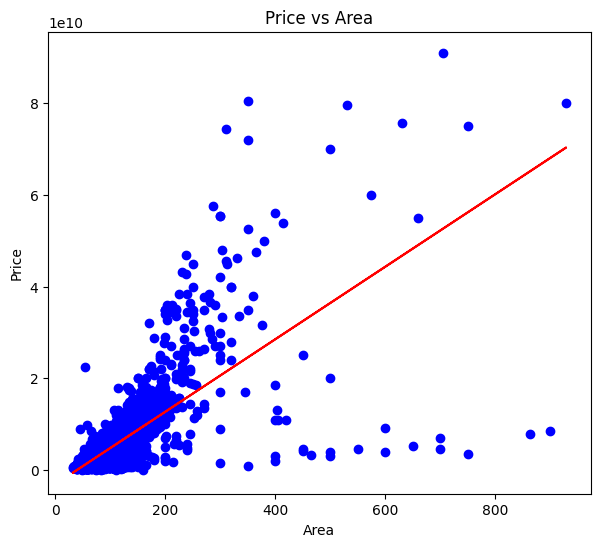

In [322]:
plt.figure(figsize= (7, 6))
plt.scatter(x= train_set.Area, y= train_set.Price, color= 'blue')
plt.plot(train_x2, regr.intercept_[0] + regr.coef_[0][0] * train_x2, color= 'red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [232]:
train_poly_x2 = poly.fit_transform(train_set[['Area']])
train_poly_x2

array([[1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 5.7000e+01, 3.2490e+03],
       [1.0000e+00, 8.0000e+01, 6.4000e+03],
       ...,
       [1.0000e+00, 8.7000e+01, 7.5690e+03],
       [1.0000e+00, 1.5500e+02, 2.4025e+04],
       [1.0000e+00, 1.2000e+02, 1.4400e+04]])

In [234]:
regr.fit(train_poly_x2, train_y2)
print(regr.coef_)
print(regr.intercept_)

[[ 0.00000000e+00  1.29869859e+08 -9.31884948e+04]]
[-7.0064258e+09]


In [236]:
train_set['Area'].describe()

count    2778.000000
mean      107.596112
std        72.150003
min        32.000000
25%        68.000000
50%        90.000000
75%       120.000000
max       929.000000
Name: Area, dtype: float64

In [240]:
area_x = np.arange(32, 930)
yy2 = regr.intercept_[0] + regr.coef_[0][1] * area_x + regr.coef_[0][2] * np.power(area_x, 2)

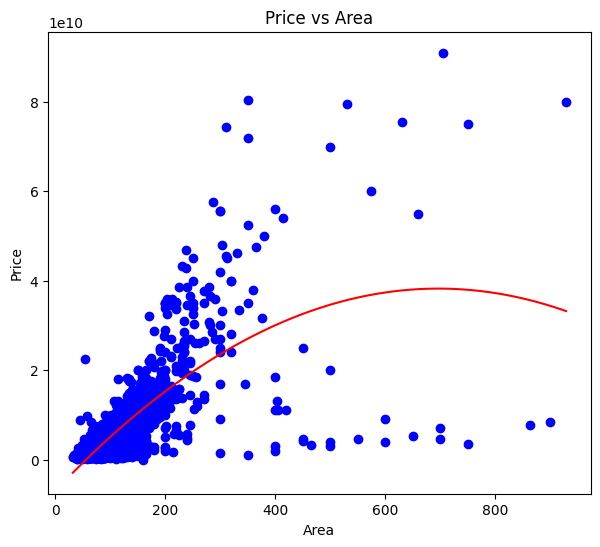

In [242]:
plt.figure(figsize= (7, 6))
plt.scatter(x= train_set.Area, y= train_set.Price, color= 'blue')
plt.plot(area_x, yy2, color= 'red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [330]:
train_m_x = np.asanyarray(train_set[['Area', 'Room']])
print(train_m_x)
train_y = np.asanyarray(train_set[['Price']])

[[165   3]
 [ 57   1]
 [ 80   2]
 ...
 [ 87   2]
 [155   3]
 [120   2]]


In [332]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree= 2, include_bias= False)
train_m_poly_x = poly2.fit_transform(train_m_x)
print(train_m_poly_x)
print(poly2.get_feature_names_out())

[[1.6500e+02 3.0000e+00 2.7225e+04 4.9500e+02 9.0000e+00]
 [5.7000e+01 1.0000e+00 3.2490e+03 5.7000e+01 1.0000e+00]
 [8.0000e+01 2.0000e+00 6.4000e+03 1.6000e+02 4.0000e+00]
 ...
 [8.7000e+01 2.0000e+00 7.5690e+03 1.7400e+02 4.0000e+00]
 [1.5500e+02 3.0000e+00 2.4025e+04 4.6500e+02 9.0000e+00]
 [1.2000e+02 2.0000e+00 1.4400e+04 2.4000e+02 4.0000e+00]]
['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


In [334]:
regr.fit(train_m_poly_x, train_y)
print(regr.coef_)
print(regr.intercept_)

[[ 9.21814876e+07 -3.68190376e+09 -1.43400090e+05  2.23038020e+07
   1.28783564e+08]]
[-8.81802952e+08]


In [336]:
test_m_x = np.asanyarray(test_set[['Area', 'Room']])
test_y = np.asanyarray(test_set[['Price']])
print(test_m_x)

[[145   3]
 [ 97   2]
 [125   3]
 ...
 [ 87   2]
 [ 65   2]
 [283   3]]


In [338]:
test_poly_m_x = poly2.fit_transform(test_m_x)
print(test_poly_m_x)

[[1.4500e+02 3.0000e+00 2.1025e+04 4.3500e+02 9.0000e+00]
 [9.7000e+01 2.0000e+00 9.4090e+03 1.9400e+02 4.0000e+00]
 [1.2500e+02 3.0000e+00 1.5625e+04 3.7500e+02 9.0000e+00]
 ...
 [8.7000e+01 2.0000e+00 7.5690e+03 1.7400e+02 4.0000e+00]
 [6.5000e+01 2.0000e+00 4.2250e+03 1.3000e+02 4.0000e+00]
 [2.8300e+02 3.0000e+00 8.0089e+04 8.4900e+02 9.0000e+00]]


In [340]:
y_hat = regr.predict(test_poly_m_x)

In [342]:
from sklearn.metrics import r2_score
print(r2_score(test_y, y_hat))

0.6811125920429913


In [350]:
x0 = 100
x1 = 2

In [352]:
y_predict = regr.intercept_[0] + regr.coef_[0][0] * x0 + regr.coef_[0][1] * x1 + regr.coef_[0][2] * np.power(x0, 2) + regr.coef_[0][3] * (x0 * x1) + regr.coef_[0][4] * np.power(x1, 2)

In [354]:
y_predict

4514432057.346543